In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar el dataset
file_path = 'winequality-red.csv'
data = pd.read_csv(file_path)

Primeras filas del dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8    

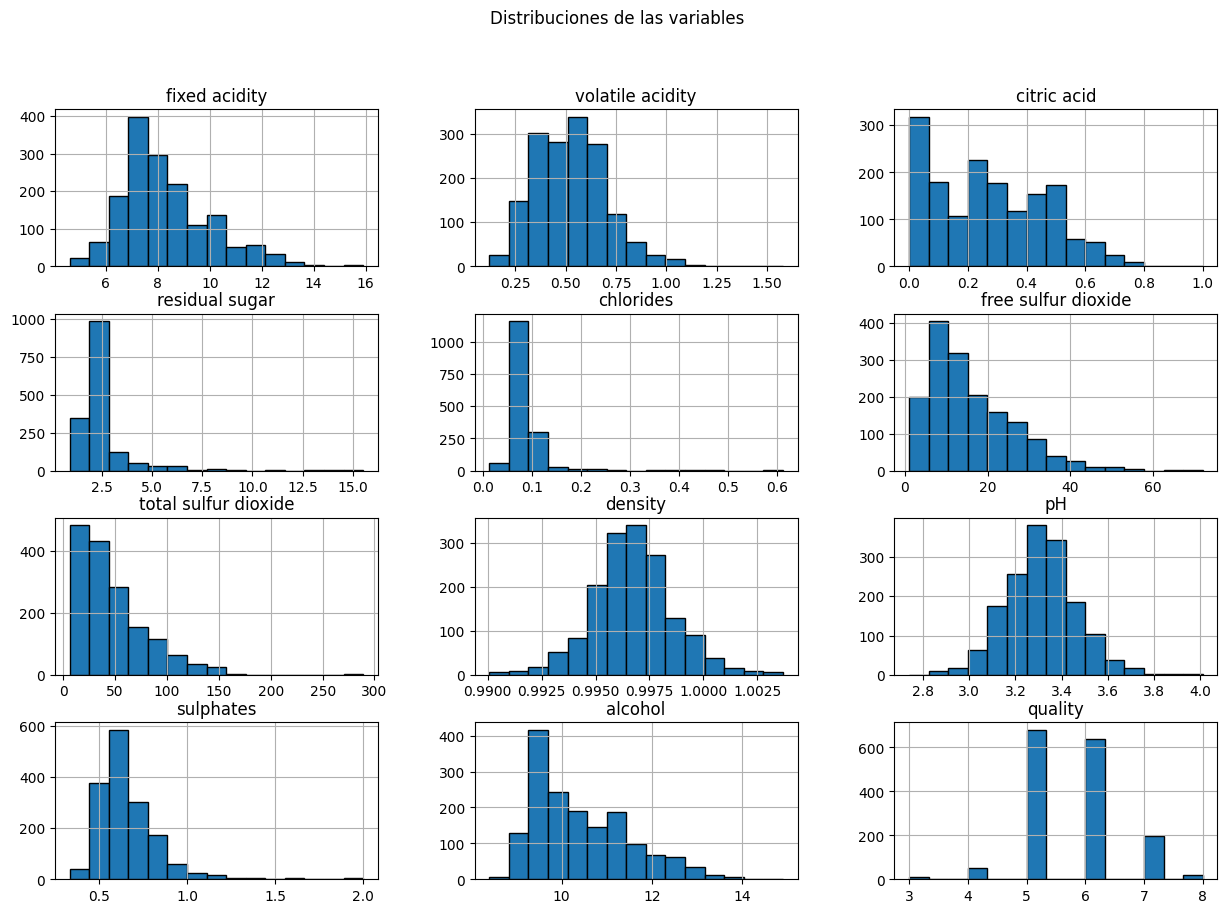

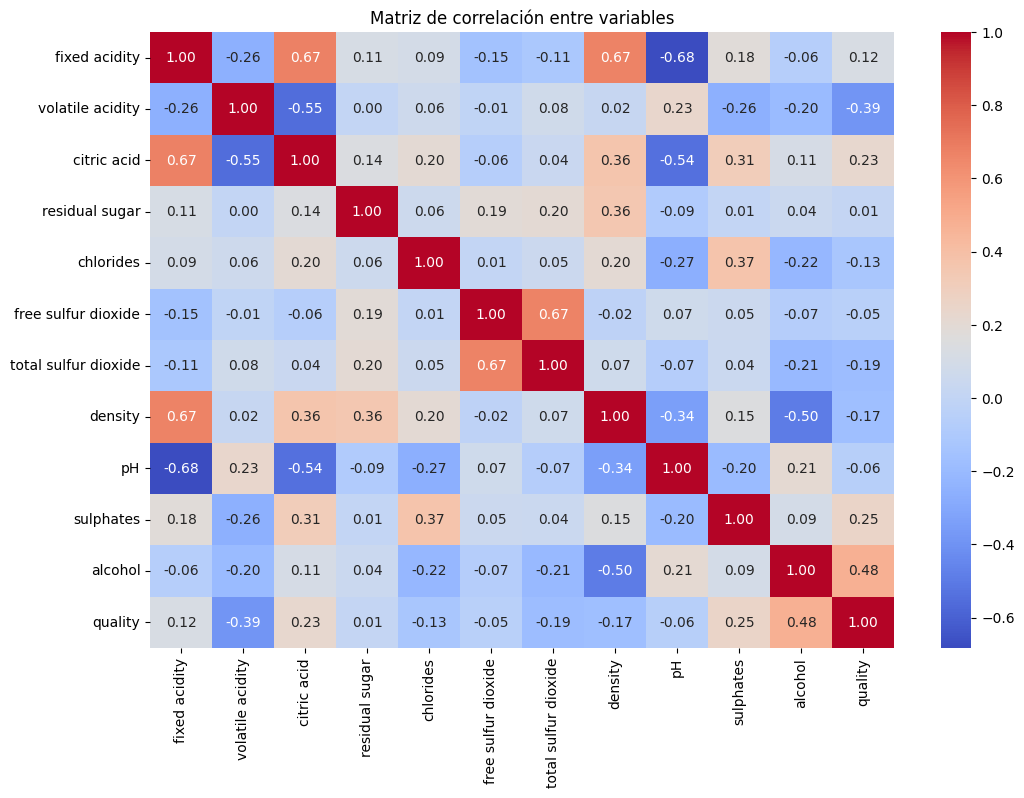

In [3]:
# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(data.head())

# Paso 1.1: Estadísticas descriptivas generales
print("\nEstadísticas descriptivas:")
print(data.describe())

# Paso 1.2: Comprobación de valores faltantes
print("\nValores faltantes por columna:")
print(data.isnull().sum())

# Paso 1.3: Histogramas para visualizar las distribuciones de las variables
data.hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribuciones de las variables')
plt.show()

# Paso 1.4: Matriz de correlación para analizar relaciones entre variables
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Matriz de correlación entre variables')
plt.show()

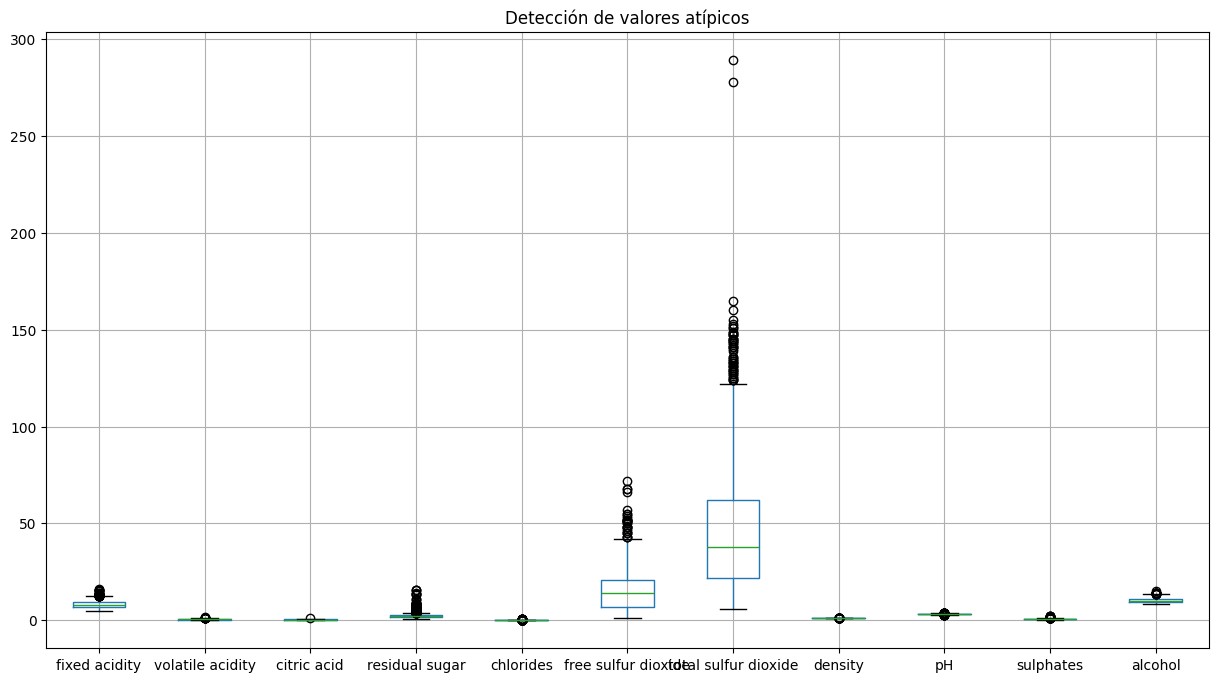


Valores atípicos detectados por columna:
fixed acidity: 49 valores atípicos
volatile acidity: 19 valores atípicos
citric acid: 1 valores atípicos
residual sugar: 155 valores atípicos
chlorides: 112 valores atípicos
free sulfur dioxide: 30 valores atípicos
total sulfur dioxide: 55 valores atípicos
density: 45 valores atípicos
pH: 35 valores atípicos
sulphates: 59 valores atípicos
alcohol: 13 valores atípicos


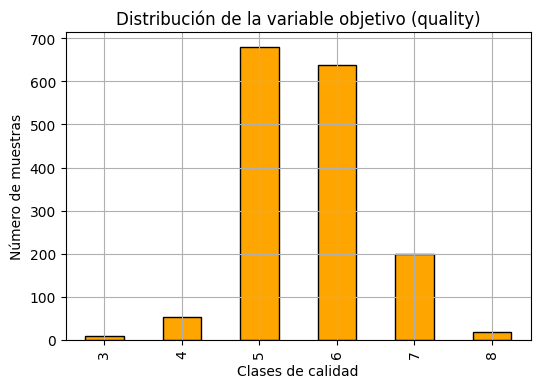


Primeras filas del dataset preprocesado:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   
3             0.107592              0.411500  0.664277 -0.979104  -0.461180   
4            -0.466193             -0.379133  0.558274  1.288643  -0.579207   

    alcohol  q

In [4]:
#2. Preprocesamiento de los datos
from sklearn.preprocessing import StandardScaler

# Paso 1: Detección y tratamiento de valores atípicos
# Visualización de valores atípicos
plt.figure(figsize=(15, 8))
data.boxplot(column=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                     'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])
plt.title("Detección de valores atípicos")
plt.show()

# Función para detectar valores atípicos con IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detectar valores atípicos en cada columna numérica
numerical_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                     'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
outliers_summary = {col: len(detect_outliers_iqr(data, col)) for col in numerical_columns}

print("\nValores atípicos detectados por columna:")
for col, count in outliers_summary.items():
    print(f"{col}: {count} valores atípicos")

# Paso 2: Escalado de variables numéricas
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Paso 3: Comprobación del balance de la variable objetivo
plt.figure(figsize=(6, 4))
data['quality'].value_counts().sort_index().plot(kind='bar', color='orange', edgecolor='black')
plt.title("Distribución de la variable objetivo (quality)")
plt.xlabel("Clases de calidad")
plt.ylabel("Número de muestras")
plt.grid(True)
plt.show()

# Mostrar las primeras filas del dataset preprocesado
print("\nPrimeras filas del dataset preprocesado:")
print(data.head())

Correlaciones con la variable objetivo (quality):
quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


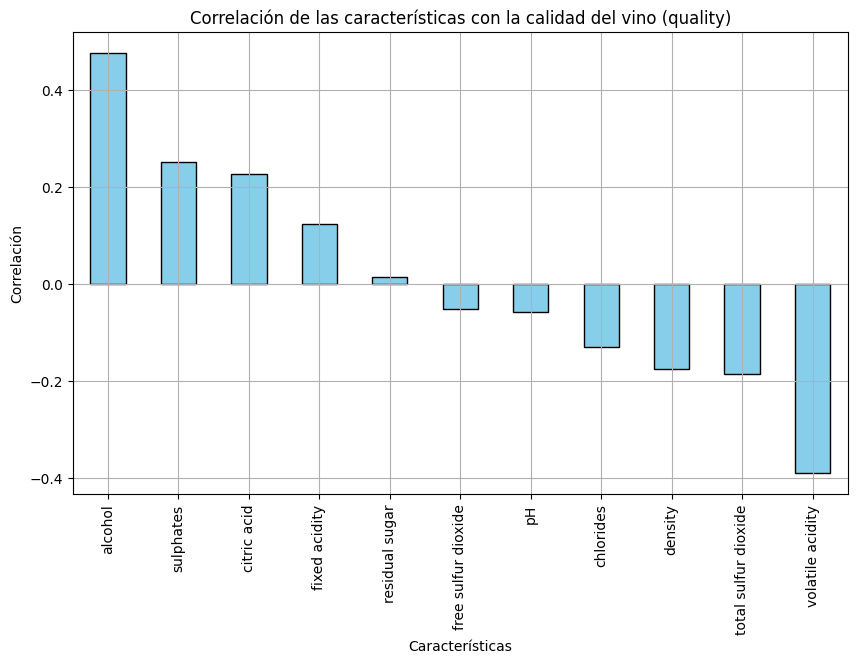


Importancia de características según Árbol de Decisión:
alcohol: 0.1813
sulphates: 0.1201
total sulfur dioxide: 0.1084
volatile acidity: 0.1038
residual sugar: 0.0934
pH: 0.0825
density: 0.0644
fixed acidity: 0.0643
citric acid: 0.0635
free sulfur dioxide: 0.0603
chlorides: 0.0581


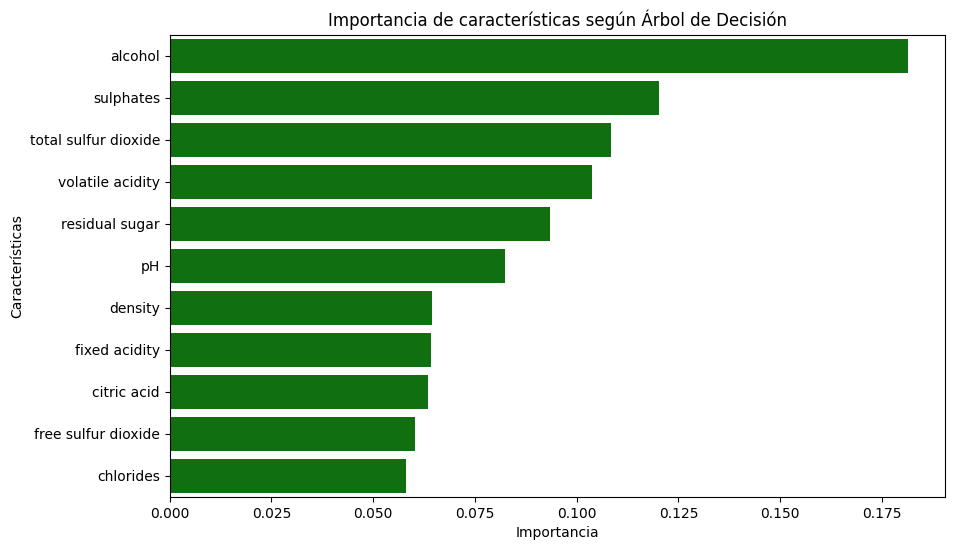


Características seleccionadas:
Index(['alcohol', 'sulphates', 'total sulfur dioxide', 'volatile acidity',
       'residual sugar'],
      dtype='object')


In [6]:
#3. Selección de características relevantes
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 3.1: Análisis de correlación
correlations = data.corr()['quality'].sort_values(ascending=False)
print("Correlaciones con la variable objetivo (quality):")
print(correlations)

# Visualizar las correlaciones en un gráfico de barras
plt.figure(figsize=(10, 6))
correlations.drop('quality').plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Correlación de las características con la calidad del vino (quality)')
plt.xlabel('Características')
plt.ylabel('Correlación')
plt.grid(True)
plt.show()

# Paso 3.2: Importancia de características usando un Árbol de Decisión
X = data.drop('quality', axis=1)  # Características
y = data['quality']  # Variable objetivo

# Entrenar un árbol de decisión preliminar
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X, y)

# Obtener importancias de características
feature_importances = tree.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
feature_names = X.columns[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# Mostrar las características más importantes
print("\nImportancia de características según Árbol de Decisión:")
for name, importance in zip(feature_names, sorted_importances):
    print(f"{name}: {importance:.4f}")

# Visualizar importancias de características (corrección del aviso)
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances, y=feature_names, color="green")
plt.title('Importancia de características según Árbol de Decisión')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

# Seleccionar características principales (con importancia mayor al promedio)
important_features = feature_names[sorted_importances > sorted_importances.mean()]
print("\nCaracterísticas seleccionadas:")
print(important_features)

In [7]:
#4. División del dataset en Train y Test
from sklearn.model_selection import train_test_split

# Paso 4.1: Filtrar las características seleccionadas
selected_features = ['alcohol', 'sulphates', 'total sulfur dioxide', 'volatile acidity', 'residual sugar']
X = data[selected_features]  # Variables independientes
y = data['quality']  # Variable objetivo

# Paso 4.2: División del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Paso 4.3: Mostrar tamaños de los conjuntos generados
print("Tamaños del conjunto de entrenamiento y prueba:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

Tamaños del conjunto de entrenamiento y prueba:
X_train: (1119, 5), y_train: (1119,)
X_test: (480, 5), y_test: (480,)


In [8]:
#5. Entrenamiento del modeloEntrenamiento del modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Paso 5.1: Crear el modelo base
tree_model = DecisionTreeClassifier(random_state=42)

# Paso 5.2: Configurar los hiperparámetros a probar
param_grid = {
    'max_depth': [3, 5, 10, None],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],  # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Mínimo de muestras en cada hoja
    'criterion': ['gini', 'entropy']  # Función de evaluación
}

# Paso 5.3: Realizar búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Paso 5.4: Obtener el mejor modelo
best_tree_model = grid_search.best_estimator_
print("\nMejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Paso 5.5: Entrenar el mejor modelo
best_tree_model.fit(X_train, y_train)
print("\nModelo entrenado con éxito.")

Fitting 5 folds for each of 72 candidates, totalling 360 fits

Mejores hiperparámetros encontrados:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Modelo entrenado con éxito.


Precisión (Accuracy): 0.5958

Informe de clasificación detallado:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.23      0.19      0.21        16
           5       0.69      0.69      0.69       204
           6       0.58      0.60      0.59       192
           7       0.47      0.40      0.43        60
           8       0.29      0.40      0.33         5

    accuracy                           0.60       480
   macro avg       0.38      0.38      0.38       480
weighted avg       0.59      0.60      0.59       480



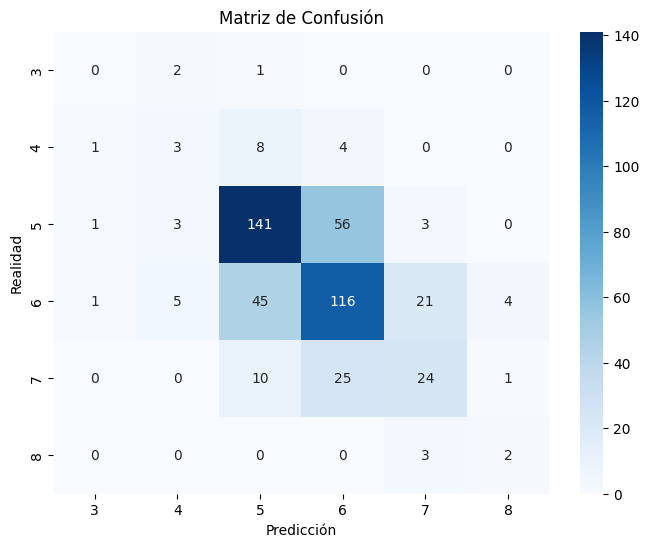

In [9]:
#6. Evaluación del modelo en el conjunto de prueba
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

# Paso 6.1: Realizar predicciones en el conjunto de prueba
y_pred = best_tree_model.predict(X_test)

# Paso 6.2: Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión (Accuracy): {accuracy:.4f}")

# Informe de clasificación detallado
print("\nInforme de clasificación detallado:")
print(classification_report(y_test, y_pred))

# Paso 6.3: Generar y visualizar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

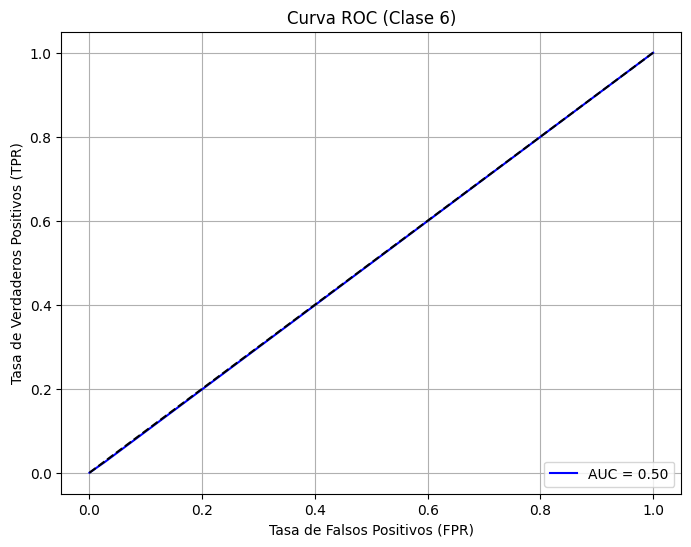

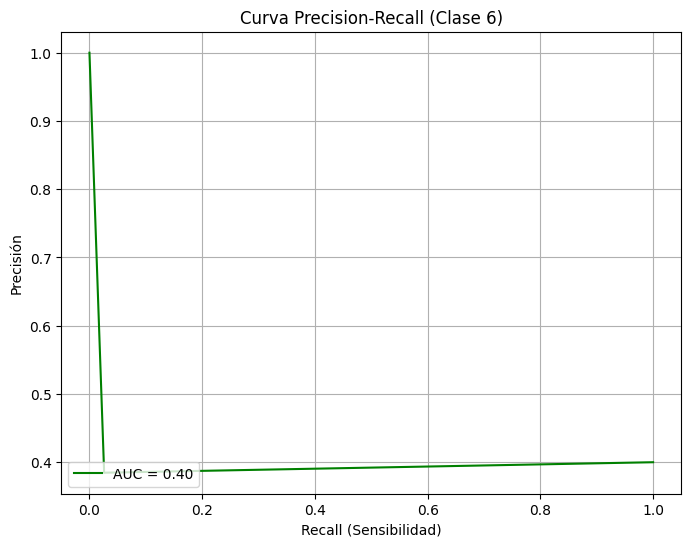

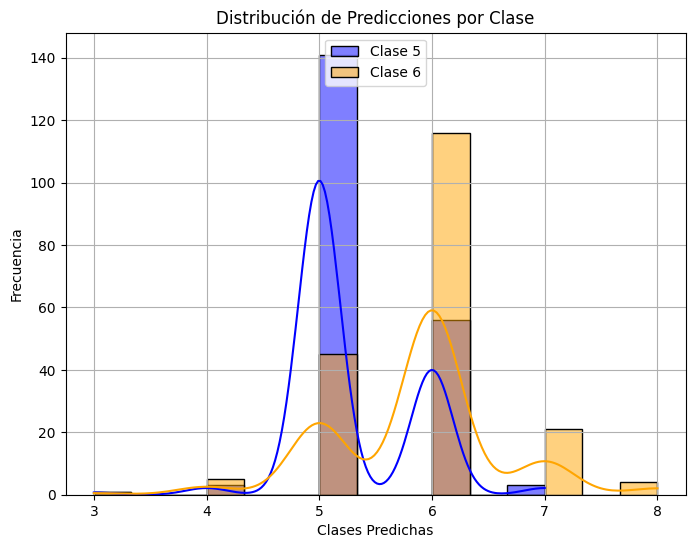

In [10]:
#7. Visualizacion
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

# Paso 7.1: Curva ROC y AUC (restringida a clases binarizadas)
# Nota: Esto se realiza considerando una clase frente al resto para simplificar ROC/AUC
y_test_binarized = (y_test == 6).astype(int)  # Binarizamos una clase relevante (por ejemplo, clase 6)
y_pred_proba = best_tree_model.predict_proba(X_test)[:, 1]  # Probabilidades para una clase (6 en este caso)

fpr, tpr, _ = roc_curve(y_test_binarized, y_pred_proba)
roc_auc = roc_auc_score(y_test_binarized, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Curva ROC (Clase 6)')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Paso 7.2: Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test_binarized, y_pred_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AUC = {pr_auc:.2f}', color='green')
plt.title('Curva Precision-Recall (Clase 6)')
plt.xlabel('Recall (Sensibilidad)')
plt.ylabel('Precisión')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

# Paso 7.3: Distribución de predicciones por clase
plt.figure(figsize=(8, 6))
sns.histplot(y_pred[y_test == 5], color='blue', label='Clase 5', kde=True)
sns.histplot(y_pred[y_test == 6], color='orange', label='Clase 6', kde=True)
plt.title('Distribución de Predicciones por Clase')
plt.xlabel('Clases Predichas')
plt.ylabel('Frecuencia')
plt.legend(loc='upper center')
plt.grid(True)
plt.show()